<a href="https://colab.research.google.com/github/jiin124/MachineLearning/blob/main/%EB%89%B4%EC%9A%95%EC%97%90%EC%84%9C_%EB%B0%A9%EC%9D%B4_%EB%91%98_%EB%94%B8%EB%A6%B0_%EC%A7%91%EC%9D%84_%EC%97%90%EC%96%B4%EB%B9%84%EC%97%94%EB%B9%84%EC%97%90_%EB%82%B4%EB%86%93%EC%9C%BC%EB%A0%A4_%ED%95%9C%EB%8B%A4%2C_%EC%9D%B4_%EB%95%8C_%EC%A0%81%EB%8B%B9%ED%95%9C_%EC%88%99%EB%B0%95%EB%A3%8C%EB%A5%BC_%EA%B5%AC%ED%95%98%EC%8B%9C%EC%98%A4(%EB%AC%B8%EC%A0%9C).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 주제 : 뉴욕에서 방이 둘 딸린 집을 에어비엔비에 내놓으려 한다. 이 때 적당한 숙박료를 구하시오. (5점)
----------

## 실습 가이드
    1. 데이터를 다운로드하여 Colab에 불러옵니다.
    2. 필요한 라이브러리는 모두 코드로 작성되어 있습니다.
    3. 코드는 위에서부터 아래로 순서대로 실행합니다.
    
    
## 데이터 소개
    - 이번 주제는 New York City Airbnb Open Data를 사용합니다.
    
    - 다음 1개의 csv 파일을 사용합니다.
    AB_NYC_2019.csv
    
    - 각 파일의 컬럼은 아래와 같습니다.
    id: 항목의 ID
    name: 항목의 이름 (타이틀)
    host_id: 호스트 ID
    host_name: 호스트의 이름
    neighbourhood_group: 방이 있는 구역 그룹
    neighbourhood: 방이 있는 구역
    latitude: 방이 위치한 위도
    longitude: 방이 위치한 경도
    room_type: 방의 종류
    price: 가격 (미 달러)
    minimum_nights: 최소 숙박 일수
    number_of_reviews: 리뷰의 개수
    last_review: 마지막 리뷰 일자
    reviews_per_month: 월별 리뷰 개수
    calculated_host_listings_count: 호스트가 올린 방 개수
    availability_365: 365일 중 가능한 일수

    
- 데이터 출처: https://www.kaggle.com/dgomonov/new-york-city-airbnb-open-data

## 최종 목표
    - 스크래핑된 dirty 데이터 클리닝 방법 이해
    - 다양한 종류의 데이터 정규화 방법 습득
    - 데이터 시각화를 통한 인사이트 습득 방법의 이해
    - Scikit-learn 기반의 모델 학습 방법 습득
    - 학습된 모델로 부터의 인사이트 획득 방법 습득



## Step 0. Regression에 대하여

### 선형 회귀에 대하여

### 그 외의 회귀 방법


## Step 1. 데이터셋 준비하기

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### 문제 1. Colab Notebook에 Kaggle API 세팅하기


In [2]:
import os

In [3]:
# os.environ을 이용하여 Kaggle API Username, Key 세팅하기
os.environ['KAGGLE_USERNAME']='jiinpp'
os.environ['KAGGLE_KEY']='b06d525a9f66198051ccb648b091778a'



### 문제 2. 데이터 다운로드 및 압축 해제하기


In [4]:
# Linux 명령어로 Kaggle API를 이용하여 데이터셋 다운로드하기 (!kaggle ~)
# Linux 명령어로 압축 해제하기
!rm *.*
!kaggle datasets download -d dgomonov/new-york-city-airbnb-open-data
!unzip '*.zip'




rm: cannot remove '*.*': No such file or directory
  0% 0.00/2.44M [00:00<?, ?B/s]
100% 2.44M/2.44M [00:00<00:00, 82.4MB/s]
Archive:  new-york-city-airbnb-open-data.zip
  inflating: AB_NYC_2019.csv         
  inflating: New_York_City_.png      


### 문제 3. Pandas 라이브러리로 csv파일 읽어들이기


In [5]:
df = pd.read_csv("AB_NYC_2019.csv")

In [6]:
df

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48890,36484665,Charming one bedroom - newly renovated rowhouse,8232441,Sabrina,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,NaN,NaN,2,9
48891,36485057,Affordable room in Bushwick/East Williamsburg,6570630,Marisol,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,NaN,NaN,2,36
48892,36485431,Sunny Studio at Historical Neighborhood,23492952,Ilgar & Aysel,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,NaN,NaN,1,27
48893,36485609,43rd St. Time Square-cozy single bed,30985759,Taz,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,NaN,NaN,6,2


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

## Step 2. EDA 및 데이터 기초 통계 분석


### 문제 4. 불필요한 데이터 데이터프레임에서 제거하기


In [8]:
# DataFrame에서 제공하는 메소드를 이용하여 각 데이터프레임의 구조 분석하기 (head(), info(), describe())
# 데이터프레임에서 불필요한 컬럼 제거하기
df.head()



,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [10]:
df.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,38843.000000,48895.000000,48895.000000
mean,1.901714e+07,6.762001e+07,40.728949,-73.952170,152.720687,7.029962,23.274466,1.373221,7.143982,112.781327
std,1.098311e+07,7.861097e+07,0.054530,0.046157,240.154170,20.510550,44.550582,1.680442,32.952519,131.622289
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,9.471945e+06,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,1.967728e+07,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,0.720000,1.000000,45.000000
75%,2.915218e+07,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,2.020000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


In [11]:
df.drop(['latitude','longitude','id','name','host_name'],axis=1,inplace=True)

In [12]:
df.isnull().sum()

host_id                               0
neighbourhood_group                   0
neighbourhood                         0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

### 문제 5. 수치형 데이터와 Price의 Jointplot 분석하기


In [13]:
df.columns


Index(['host_id', 'neighbourhood_group', 'neighbourhood', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365'],
      dtype='object')

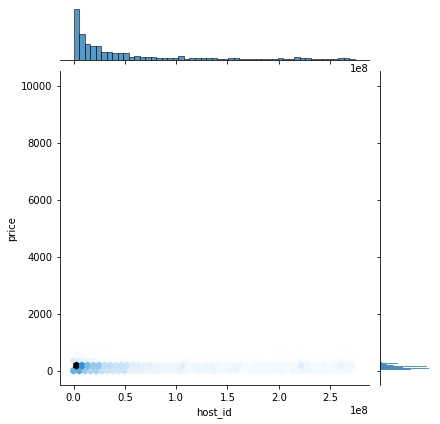

In [14]:
sns.jointplot(x='host_id',y='price',data=df,kind='hex')

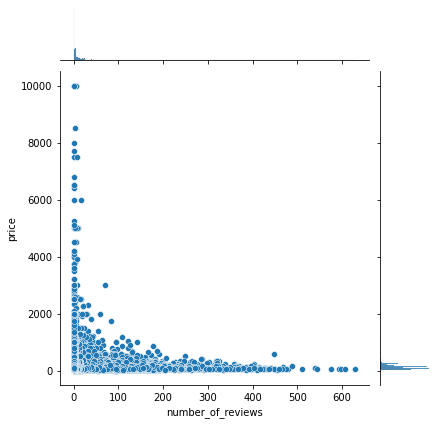

In [15]:
sns.jointplot(x='number_of_reviews',y='price',data=df)

### 문제 6. 수치형 데이터와 Price의 상관성 분석하기

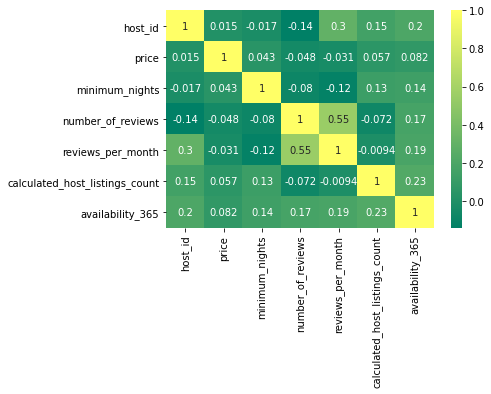

In [16]:
sns.heatmap(df.corr(),annot=True,cmap='summer')






### 문제 7. 범주형 데이터와 Price의 Boxplot 계열 및 Histogram 분석하기

In [17]:
df.columns







Index(['host_id', 'neighbourhood_group', 'neighbourhood', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365'],
      dtype='object')

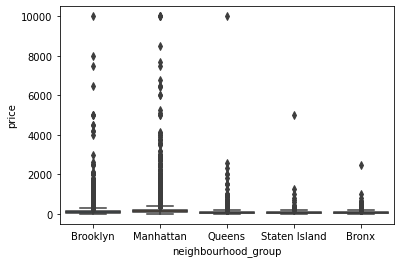

In [18]:
sns.boxplot(x='neighbourhood_group',y='price',data=df)

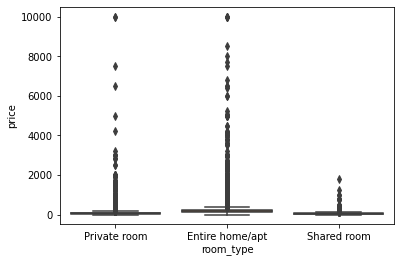

In [19]:
sns.boxplot(x='room_type',y='price',data=df)

## Step 3. 데이터 클리닝 수행하기

### 문제 8. 미기입, 오기입 데이터 확인하기

In [20]:
# 각 컬럼을 분석하여 미기입/오기입된 데이터 확인하기
# Hint) 수치형 데이터는 통계를 이용해서, 범주형 데이터는 unique(), value_counts()등으로 확인

df.columns




Index(['host_id', 'neighbourhood_group', 'neighbourhood', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365'],
      dtype='object')

In [27]:
df.head()

,host_id,neighbourhood_group,neighbourhood,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2787,Brooklyn,others,Private room,149,1,9,2018-10-19,0.21,6,365
1,2845,Manhattan,Midtown,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,4632,Manhattan,Harlem,Private room,150,3,0,NaN,NaN,1,365
3,4869,Brooklyn,Clinton Hill,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,7192,Manhattan,East Harlem,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [45]:
df.isnull().sum()

host_id                              0
neighbourhood_group                  0
neighbourhood                        0
room_type                            0
price                                0
minimum_nights                       0
number_of_reviews                    0
last_review                       7539
reviews_per_month                 7539
calculated_host_listings_count       0
availability_365                     0
is_avail_zero                        0
dtype: int64

In [29]:
df['neighbourhood_group'].value_counts()

Manhattan        21661
Brooklyn         20104
Queens            5666
Bronx             1091
Staten Island      373
Name: neighbourhood_group, dtype: int64

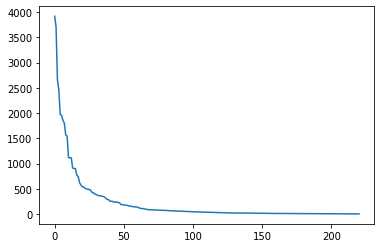

In [24]:
neigh=df['neighbourhood'].value_counts()
plt.plot(range(len(neigh)),neigh)

In [25]:
df['neighbourhood']=df['neighbourhood'].apply(lambda s:s if str(s) not in neigh[50:] else 'others')

In [26]:
df['neighbourhood'].value_counts()

others                       6248
Williamsburg                 3920
Bedford-Stuyvesant           3714
Harlem                       2658
Bushwick                     2465
Upper West Side              1971
Hell's Kitchen               1958
East Village                 1853
Upper East Side              1798
Crown Heights                1564
Midtown                      1545
East Harlem                  1117
Greenpoint                   1115
Chelsea                      1113
Lower East Side               911
Astoria                       900
Washington Heights            899
West Village                  768
Financial District            744
Flatbush                      621
Clinton Hill                  572
Long Island City              537
Prospect-Lefferts Gardens     535
Park Slope                    506
East Flatbush                 500
Fort Greene                   489
Murray Hill                   485
Kips Bay                      470
Flushing                      426
Ridgewood     

In [30]:
df['room_type'].value_counts()

Entire home/apt    25409
Private room       22326
Shared room         1160
Name: room_type, dtype: int64

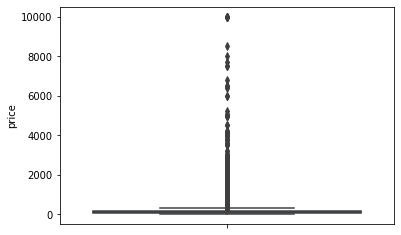

In [31]:
sns.boxplot(data=df,y='price')

In [32]:
print(df['price'].quantile(0.95))
print(df['price'].quantile(0.005))

355.0
26.0


In [34]:
df['minimum_nights'].quantile(0.98)

30.0

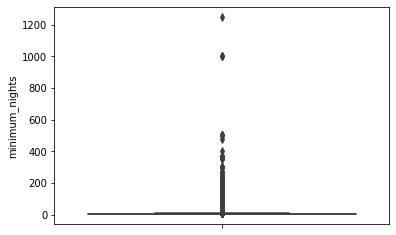

In [39]:
sns.boxplot(data=df,y='minimum_nights')

### 문제 9. 아웃라이어를 제거하고 통계 재분석하기

In [35]:
# quantile(), drop() 등 메소드를 이용하여 outlier 제거하고 통계 재분석하기

p1=df['price'].quantile(0.95)
p2=df['price'].quantile(0.005)
print(p1,p2)


355.0 26.0


In [36]:
df=df[(df['price']<p1)&(df['price']>p2)]

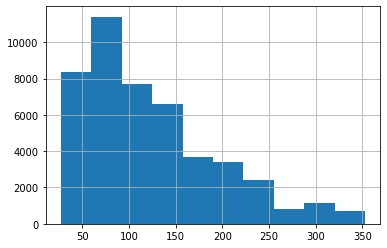

In [37]:
df['price'].hist()

In [40]:
mn1=df['minimum_nights'].quantile(0.98)
print(mn1)

30.0


In [41]:
df=df[df['minimum_nights']<mn1]

In [42]:
df['availability_365'].value_counts()

0      16482
365      802
1        366
5        320
89       315
       ...  
195       20
181       20
186       19
196       19
202       15
Name: availability_365, Length: 366, dtype: int64

In [43]:
df['is_avail_zero']=df['availability_365'].apply(lambda x:'Zero' if x==0 else 'Nonezero')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


### 문제 10. 미기입 데이터 처리하기

In [48]:
# fill(), dropna() 등으로 미기입된 데이터를 처리하기
df['reviews_exists']=df['reviews_per_month'].isna().apply(lambda x:'No' if x is True else 'yes')




/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [51]:
df.fillna(0,inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4327: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  downcast=downcast,


In [52]:
df.isnull().sum()

host_id                           0
neighbourhood_group               0
neighbourhood                     0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
last_review                       0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
is_avail_zero                     0
reviews_exists                    0
dtype: int64

## Step 4. 모델 학습을 위한 데이터 전처리 

### 문제 11. get_dummies를 이용한 범주형 데이터 전처리

In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 41980 entries, 0 to 48894
Data columns (total 13 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   host_id                         41980 non-null  int64  
 1   neighbourhood_group             41980 non-null  object 
 2   neighbourhood                   41980 non-null  object 
 3   room_type                       41980 non-null  object 
 4   price                           41980 non-null  int64  
 5   minimum_nights                  41980 non-null  int64  
 6   number_of_reviews               41980 non-null  int64  
 7   last_review                     41980 non-null  object 
 8   reviews_per_month               41980 non-null  float64
 9   calculated_host_listings_count  41980 non-null  int64  
 10  availability_365                41980 non-null  int64  
 11  is_avail_zero                   41980 non-null  object 
 12  reviews_exists                  

In [55]:
X_cat = df[['neighbourhood_group','neighbourhood','room_type',
            'last_review','is_avail_zero','reviews_exists']]
X_cat=pd.get_dummies(X_cat)






### 문제 12. StandardScaler를 이용해 수치형 데이터 표준화하기


In [56]:
from sklearn.preprocessing import StandardScaler

In [57]:
# StandardScaler를 이용해 수치형 데이터를 표준화하기
scaler = StandardScaler()
X_num = df.drop(['neighbourhood_group','neighbourhood','room_type',
            'last_review','is_avail_zero','reviews_exists','price'],axis=1)

scaler.fit(X_num)
X_scaled=scaler.transform(X_num)
X_scaled=pd.DataFrame(X_scaled,index=X_num.index,columns=X_num.columns)

X = pd.concat([X_scaled,X_cat],axis=1)
y = df['price']

In [58]:
X.head()

,host_id,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,neighbourhood_group_Bronx,neighbourhood_group_Brooklyn,neighbourhood_group_Manhattan,neighbourhood_group_Queens,neighbourhood_group_Staten Island,neighbourhood_Astoria,neighbourhood_Bedford-Stuyvesant,neighbourhood_Bushwick,neighbourhood_Carroll Gardens,neighbourhood_Chelsea,neighbourhood_Chinatown,neighbourhood_Clinton Hill,neighbourhood_Crown Heights,neighbourhood_Ditmars Steinway,neighbourhood_East Elmhurst,neighbourhood_East Flatbush,neighbourhood_East Harlem,neighbourhood_East New York,neighbourhood_East Village,neighbourhood_Elmhurst,neighbourhood_Financial District,neighbourhood_Flatbush,neighbourhood_Flushing,neighbourhood_Fort Greene,neighbourhood_Gowanus,neighbourhood_Gramercy,neighbourhood_Greenpoint,neighbourhood_Greenwich Village,neighbourhood_Harlem,neighbourhood_Hell's Kitchen,neighbourhood_Inwood,neighbourhood_Jackson Heights,neighbourhood_Jamaica,neighbourhood_Kips Bay,...,last_review_2019-06-03,last_review_2019-06-04,last_review_2019-06-05,last_review_2019-06-06,last_review_2019-06-07,last_review_2019-06-08,last_review_2019-06-09,last_review_2019-06-10,last_review_2019-06-11,last_review_2019-06-12,last_review_2019-06-13,last_review_2019-06-14,last_review_2019-06-15,last_review_2019-06-16,last_review_2019-06-17,last_review_2019-06-18,last_review_2019-06-19,last_review_2019-06-20,last_review_2019-06-21,last_review_2019-06-22,last_review_2019-06-23,last_review_2019-06-24,last_review_2019-06-25,last_review_2019-06-26,last_review_2019-06-27,last_review_2019-06-28,last_review_2019-06-29,last_review_2019-06-30,last_review_2019-07-01,last_review_2019-07-02,last_review_2019-07-03,last_review_2019-07-04,last_review_2019-07-05,last_review_2019-07-06,last_review_2019-07-07,last_review_2019-07-08,is_avail_zero_Nonezero,is_avail_zero_Zero,reviews_exists_No,reviews_exists_yes
0,-0.848227,-0.588004,-0.352358,-0.588299,0.066069,2.132586,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1
1,-0.848227,-0.588004,0.419649,-0.485721,-0.084134,2.052616,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1
2,-0.848204,-0.119342,-0.545360,-0.715013,-0.121684,2.132586,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0
3,-0.848200,-0.588004,5.244692,2.084766,-0.121684,0.765095,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1
4,-0.848170,1.520973,-0.352358,-0.654673,-0.121684,-0.786327,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1


In [60]:
X.describe()

,host_id,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,neighbourhood_group_Bronx,neighbourhood_group_Brooklyn,neighbourhood_group_Manhattan,neighbourhood_group_Queens,neighbourhood_group_Staten Island,neighbourhood_Astoria,neighbourhood_Bedford-Stuyvesant,neighbourhood_Bushwick,neighbourhood_Carroll Gardens,neighbourhood_Chelsea,neighbourhood_Chinatown,neighbourhood_Clinton Hill,neighbourhood_Crown Heights,neighbourhood_Ditmars Steinway,neighbourhood_East Elmhurst,neighbourhood_East Flatbush,neighbourhood_East Harlem,neighbourhood_East New York,neighbourhood_East Village,neighbourhood_Elmhurst,neighbourhood_Financial District,neighbourhood_Flatbush,neighbourhood_Flushing,neighbourhood_Fort Greene,neighbourhood_Gowanus,neighbourhood_Gramercy,neighbourhood_Greenpoint,neighbourhood_Greenwich Village,neighbourhood_Harlem,neighbourhood_Hell's Kitchen,neighbourhood_Inwood,neighbourhood_Jackson Heights,neighbourhood_Jamaica,neighbourhood_Kips Bay,...,last_review_2019-06-03,last_review_2019-06-04,last_review_2019-06-05,last_review_2019-06-06,last_review_2019-06-07,last_review_2019-06-08,last_review_2019-06-09,last_review_2019-06-10,last_review_2019-06-11,last_review_2019-06-12,last_review_2019-06-13,last_review_2019-06-14,last_review_2019-06-15,last_review_2019-06-16,last_review_2019-06-17,last_review_2019-06-18,last_review_2019-06-19,last_review_2019-06-20,last_review_2019-06-21,last_review_2019-06-22,last_review_2019-06-23,last_review_2019-06-24,last_review_2019-06-25,last_review_2019-06-26,last_review_2019-06-27,last_review_2019-06-28,last_review_2019-06-29,last_review_2019-06-30,last_review_2019-07-01,last_review_2019-07-02,last_review_2019-07-03,last_review_2019-07-04,last_review_2019-07-05,last_review_2019-07-06,last_review_2019-07-07,last_review_2019-07-08,is_avail_zero_Nonezero,is_avail_zero_Zero,reviews_exists_No,reviews_exists_yes
count,4.198000e+04,4.198000e+04,4.198000e+04,4.198000e+04,4.198000e+04,4.198000e+04,41980.000000,41980.000000,41980.000000,41980.000000,41980.000000,41980.000000,41980.000000,41980.000000,41980.000000,41980.000000,41980.000000,41980.000000,41980.000000,41980.000000,41980.000000,41980.000000,41980.000000,41980.000000,41980.000000,41980.000000,41980.000000,41980.000000,41980.000000,41980.000000,41980.000000,41980.000000,41980.000000,41980.000000,41980.000000,41980.000000,41980.000000,41980.000000,41980.000000,41980.000000,...,41980.000000,41980.000000,41980.000000,41980.000000,41980.000000,41980.000000,41980.000000,41980.000000,41980.000000,41980.000000,41980.000000,41980.000000,41980.000000,41980.000000,41980.000000,41980.000000,41980.000000,41980.000000,41980.000000,41980.000000,41980.000000,41980.000000,41980.000000,41980.000000,41980.000000,41980.000000,41980.000000,41980.000000,41980.000000,41980.000000,41980.000000,41980.000000,41980.000000,41980.000000,41980.000000,41980.000000,41980.000000,41980.000000,41980.000000,41980.000000
mean,-2.970703e-15,-1.996138e-15,1.507559e-14,-2.644605e-15,-4.076133e-14,-1.396144e-14,0.024107,0.433468,0.410862,0.123440,0.008123,0.019771,0.080562,0.053454,0.005026,0.020057,0.007909,0.012172,0.034278,0.007099,0.004335,0.010314,0.024559,0.004907,0.038256,0.004883,0.013411,0.013840,0.009266,0.009886,0.005098,0.006432,0.023559,0.007456,0.057289,0.035779,0.005693,0.004121,0.005241,0.007932,...,0.005145,0.003430,0.002668,0.002430,0.003359,0.005169,0.008194,0.006408,0.004407,0.004335,0.004812,0.005360,0.007909,0.013030,0.008194,0.007551,0.009171,0.009242,0.011672,0.014245,0.031634,0.019485,0.009505,0.008718,0.007408,0.008885,0.011768,0.029824,0.030086,0.014626,0.009528,0.007480,0.012935,0.012744,0.016174,0.002096,0.607384,0.392616,0.179586,0.820414
std,1.000012e+00,1.000012e+00,1.000012e+00,1.000012e+00,1.000012e+00,1.000012e+00,0.153382,0.495560,0.491996,0.328945,0.089761,0.139215,0.272165,0.224940,0.070718,0.140198,0.088579,0.109657,0.181945,0.083955,0.065702,0.101036,0.154780,0.069879,0.191817,0.069710,0.115029,0.1

### 문제 13. 학습데이터와 테스트데이터 분리하기


In [61]:
from sklearn.model_selection import train_test_split

In [62]:
# train_test_split() 함수로 학습 데이터와 테스트 데이터 분리하기
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=1)

## Step 5. Regression 모델 학습하기

### 문제 14. XGBoost Regression 모델 학습하기

In [63]:
from xgboost import XGBRegressor

In [64]:
# XGBRegressor 모델 생성/학습
model_reg = XGBRegressor()
model_reg.fit(X_train,y_train)




[14:10:42] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)

### 문제 15. 모델 학습 결과 평가하기

In [66]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
from math import sqrt

In [67]:
# Predict를 수행하고 mean_absolute_error, rmse 결과 출력하기
pred = model_reg.predict(X_test)
print(mean_absolute_error(y_test,pred))
print(sqrt(mean_squared_error(y_test,pred)))





35.40162854151478
49.43955854746937


## Step 6. 모델 학습 결과 심화 분석하기


### 문제 16. 실제 값과 추측 값의 Scatter plot 시각화하기


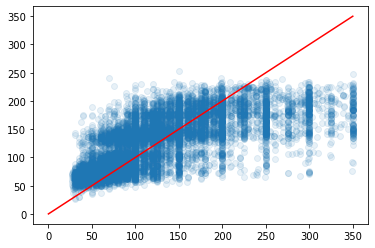

In [70]:
# y_test vs. pred Scatter 플랏으로 시각적으로 분석하기
plt.scatter(x=y_test,y=pred,alpha=0.1)
plt.plot([0,350],[0,350],'r-')





### 문제 17. 에러 값의 히스토그램 확인하기


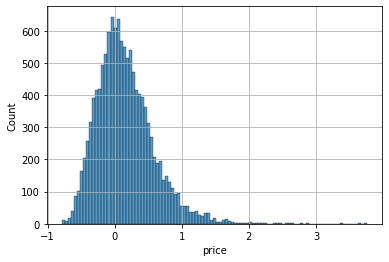

In [71]:
# err의 히스토그램으로 에러율 히스토그램 확인하기
err = (pred - y_test)/y_test
sns.histplot(err)
plt.grid()





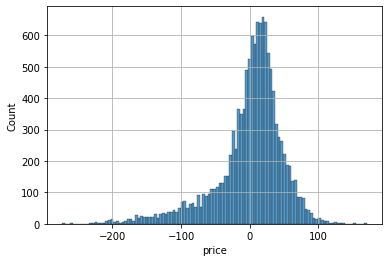

In [72]:
err = pred - y_test
sns.histplot(err)
plt.grid()